# Introduction

This notebook serves as a template for conducting a simple differential expression analysis for RNA-Seq using the DESeq2 package. Before using this template, you must have completed the bioinformatics pipeline (from fastq to count files). For each sample, you need to have a "count" file generated by htseq-count. 

## Count file location

The template assumes that the count files are located in a single directory. Here we set the directory and then check to make sure that the files you need are physically in that directory.

In [ ]:
cntdir<-"/work/????"
list.files(cntdir)

# Load packages

Load DESeq2, dplyr, qvalue packages. The dplyr package is used for manipulating the phenotype data data frame and the qvalue packages is used for calculating FDR adjusted P-values. 

In [1]:
library(DESeq2)
library(dplyr)
library(qvalue)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit


Attaching package: ‘S4Vectors’

The following objects are masked from ‘package:base’:

    c

R version 3.3.1 (2016-06-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 8 (jessie)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
[1] dplyr_0.5.0                DESeq2_1.12.3             
[3] SummarizedExperiment_1.2.3 Biobase_2.32.0            
[5] GenomicRanges_1.24.2       GenomeInfoDb_1.8.3        
[7] IRanges_2.6.1              S4Vectors_0.10.2          
[9] BiocGenerics_0.18.0       

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.2-3         genefilter_1.54.2    locfit_1.5-9.1      
 [

This template has been tested under R version 3.3.1 and DESeq2 version 1.12.3. Use sessionInfo() to confirm that you are using these version. The template may work with other versions as well

In [2]:
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 8 (jessie)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
[1] dplyr_0.5.0                DESeq2_1.12.3             
[3] SummarizedExperiment_1.2.3 Biobase_2.32.0            
[5] GenomicRanges_1.24.2       GenomeInfoDb_1.8.3        
[7] IRanges_2.6.1              S4Vectors_0.10.2          
[9] BiocGenerics_0.18.0       

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.2-3         genefilter_1.54.2    locfit_1.5-9.1      
 [

# Create phenotype data frame

To proceed, you need to create a phenotype data frame whose first column contains the sample names and whose second column contains the file names. The remaining columns should contain the experimental factors and covariates that you need for your analysis. For this template, we will name the data frame phdata.

In [ ]:
# Add your code here

# Create the DESeq2 data object

Be sure to set the appropriate design (e.g., ~trt or ~ph+trt etc)

In [75]:
dds<-DESeqDataSetFromHTSeqCount(sampleTable=phdata,design=~ trt,directory = datadir)

# Estimate Size Factors and Dispersion Parameters

You recall that DESeq requires that  we have estimates for sample specific size factors and gene specific dispersion factors. More specifically, recall that DESeq models the count $K_{ij}$ (gene $i$, sample $j$) as negative binomial with mean $\mu_{ij}$ and dispersion parameter $\alpha_i$. Here $\mu_{ij}=s_j q_{ij}$ where $\log_2(q_{ij}) = \beta_{0i} + \beta_{1i} z_j$. Here $s_j$ is the sample $j$ specific size factor.

## Size Factors

We begin by estimating the size factors $s_1,\ldots,s_n$:

In [19]:
dds <- estimateSizeFactors(dds)

## Dispersion Parameters

Next, we get the dispersion factors $\alpha_1,\ldots,\alpha_{m}$

In [29]:
dds<-estimateDispersions(dds)

gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates


# Differential Expression Analysis

We can now conduct a differential expression analysis using the DESeq() function. Keep in mind that to get to this step, we first estimated the size factors and then the dispersion parameters.

In [39]:
ddsDE<-DESeq(dds)

using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


We can get the results for the differential expression analysis using results()

In [40]:
myres<-results(ddsDE)

## Volcano Plot

In [ ]:
plot(ddsDE$log2FoldChange,-log10(ddsDE$padj),pch=19,cex=0.3,xlab="Log2 FC",ylab="-log10(BH Adjusted P-value)",col=ifelse(ddsDE$padj<0.05&abs(ddsDE$log2FoldChange)>2,"red3","black"))

## Regularized log transformation

The regularized log transform can be obtained using the rlog() function. Note that an important argument for this function is blind (TRUE by default). The default "blinds" the normalization to the design. This is very important so as to not bias the analyses (e.g. class discovery 

In [62]:
rld<-rlog(dds,blind=TRUE)

In [ ]:
# Cluster Analysis

## Hierarchical clustering using rlog transformation

In [ ]:
dists<-dist(t(assay(rld)))
plot(hclust(dists))

In [ ]:
## Principal Components Analysis

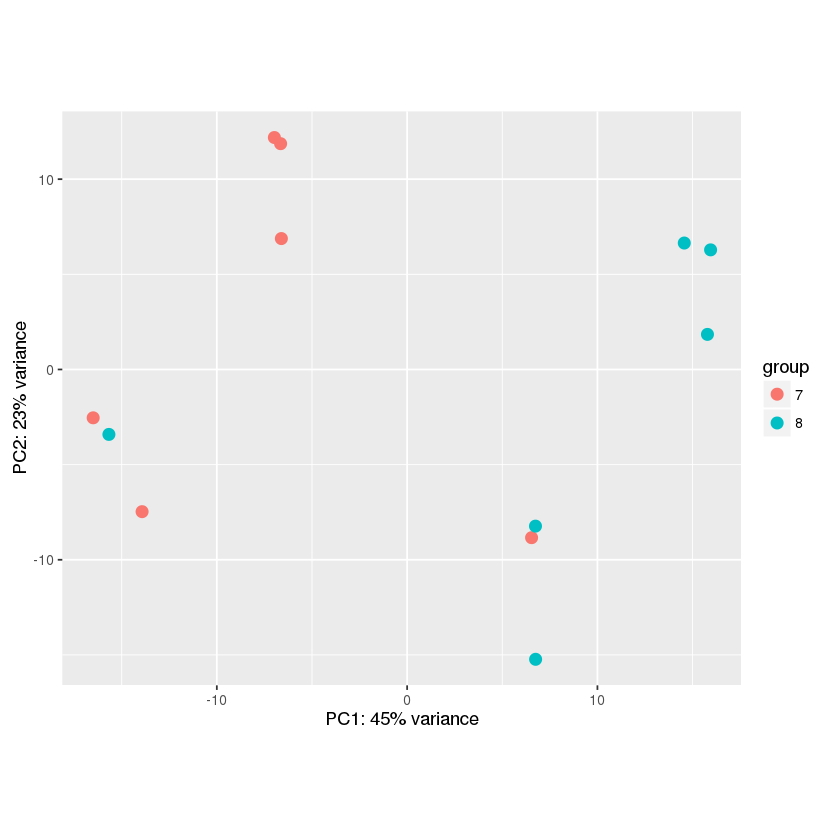

In [64]:
 plotPCA(rld,intgroup="trt")

## Change the design

### The current design is

In [76]:
design(dds)

~trt

### One can update the model to include other covariates. Suppose that we want to consider an additive model adjusting for the team effect. While this is a a good exercise, this is not a good model. Why?

In [77]:
design(dds)<- ~team+trt

### Now look at new design

In [83]:
design(dds)

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘design’ for signature ‘"factor"’


### Now conduct analysis. Be sure to be the covariate of interest as last term when you update design

In [79]:
ddsDE1<-DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


### Look at the results

In [80]:
results(ddsDE1)

log2 fold change (MAP): trt 8 vs 7 
Wald test p-value: trt 8 vs 7 
DataFrame with 4444 rows and 6 columns
           baseMean log2FoldChange     lfcSE       stat    pvalue      padj
          <numeric>      <numeric> <numeric>  <numeric> <numeric> <numeric>
gene0     17.576210     0.06091862 0.2779241  0.2191916 0.8265008 0.9162404
gene1    164.913823     0.09592256 0.1926099  0.4980147 0.6184737 0.7965539
gene10     2.364467     0.46309801 0.4368631  1.0600528 0.2891206 0.5330617
gene100   23.215440     0.09577773 0.2248745  0.4259163 0.6701688 0.8291296
gene1000   6.518029    -0.41888971 0.3770512 -1.1109623 0.2665846 0.5080035
...             ...            ...       ...        ...       ...       ...
gene995   1.6402253      0.6640623 0.4501005  1.4753643 0.1401146        NA
gene996  12.0752744     -0.2266075 0.2827058 -0.8015667 0.4228037 0.6595752
gene997   8.2583387     -0.2809066 0.3499425 -0.8027222 0.4221353 0.6595752
gene998  28.2195485     -0.1059640 0.2120636 -0.4996803 0.

In [65]:
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 8 (jessie)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C               LC_TIME=en_US.UTF-8       
 [4] LC_COLLATE=en_US.UTF-8     LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                  LC_ADDRESS=C              
[10] LC_TELEPHONE=C             LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] qvalue_2.4.2               dplyr_0.4.3                DESeq2_1.12.3             
 [4] SummarizedExperiment_1.2.3 Biobase_2.32.0             GenomicRanges_1.24.2      
 [7] GenomeInfoDb_1.8.3         IRanges_2.6.1              S4Vectors_0.10.2          
[10] BiocGenerics_0.18.0       

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.2-3         genefilter_1.54.2    locfit_1.5